# Pitch, Energy and Zero Crossing rate of Speech Signal 

In [1]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import math

print("Audio Datasets\n\tdataset/auds/", end="")
print(*os.listdir("dataset/auds"), sep="\n\tdataset/auds/")

Audio Datasets
	dataset/auds/s3.wav
	dataset/auds/s4.wav
	dataset/auds/sample1.wav
	dataset/auds/sample2.wav
	dataset/auds/set1.wav
	dataset/auds/set2.wav
	dataset/auds/set3.wav
	dataset/auds/set4.wav
	dataset/auds/Siva2.wav
	dataset/auds/speech.wav


In [17]:
import math
def calEnergy(wav_data):
    energy = []
    sum_ = 0 
    for i in range(len(wav_data)):
        sum_ = sum_ + (int(wav_data[i] )* int(wav_data[i]))
        
        if (i + 1) % 256 == 0:
            energy.append(sum_)
            sum_ = 0
            
        elif i == len(wav_data) - 1:
            energy.append(sum_)
            
    return energy

FRAME_SIZE = 1024
def process_frame(frame, fs):
    freq = max(frame)
    return freq


def zeroCR(wav_data, frame_size, overlab):
    n_frames = len(wav_data)
    
    step = frame_size - overlap
    
    frame_num = math.ceil(n_frames / step)
    zcr = np.zeros((frame_num, 1))
    for i  in range(frame_num):
        curFrame = wav_data[np.arange(i*step, min(i*step+frame_size, n_frames))]
        
        curFrame = curFrame - np.mean(curFrame)
        zcr[i]  = sum(curFrame[0: -1] * curFrame[1::]<= 0 )
        
    return zcr

Number of sample points:  314074


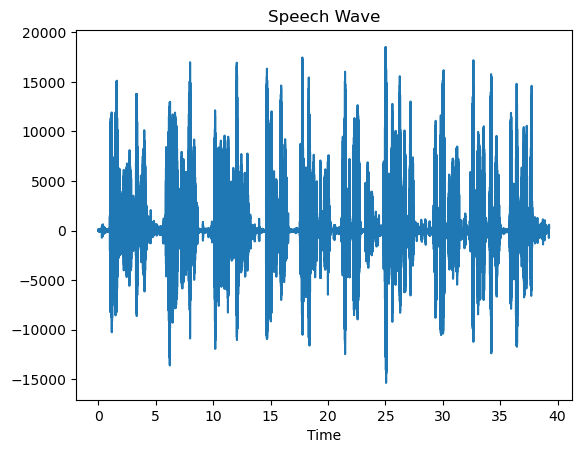

In [13]:
f = wave.open("dataset/auds/sample1.wav", "rb")
params = f.getparams()
n_channels, sample_width, frame_rate, n_frames = params[:4]
str_data = f.readframes(n_frames)
wave_data = np.frombuffer(str_data, dtype=np.short)
print("Number of sample points: ", n_frames)
time = np.linspace(0, n_frames/frame_rate, n_frames)
f.close()
plt.figure(1)
plt.title("Speech Wave")
plt.xlabel("Time")
plt.plot(time, wave_data)
plt.show()

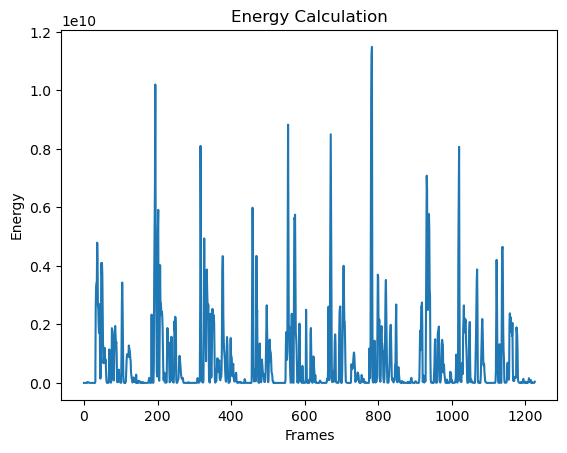

In [14]:
energy = calEnergy(wave_data)
plt.figure(1)
plt.plot(energy)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('Energy')

plt.title('Energy Calculation')
plt.show()

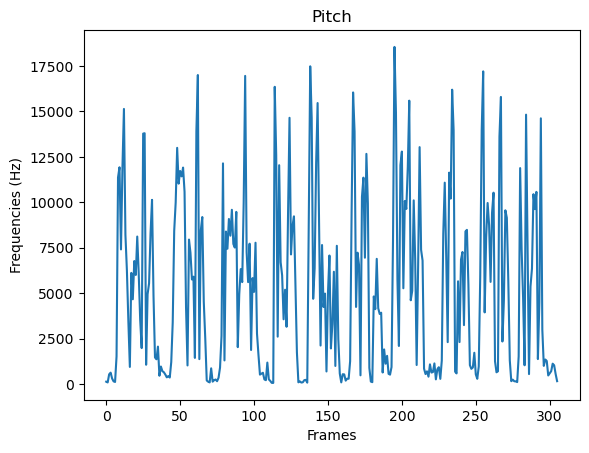

In [15]:
num_frames = n_frames // FRAME_SIZE
frequencies = np.zeros(num_frames)

for i in range(num_frames):
    frame = wave_data[i * FRAME_SIZE : (i+1) * FRAME_SIZE]
    
    frequencies[i] = process_frame(frame.astype(float), frame_rate)
    
plt.figure(1)
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('Frequencies (Hz)')

plt.title('Pitch')
plt.show()

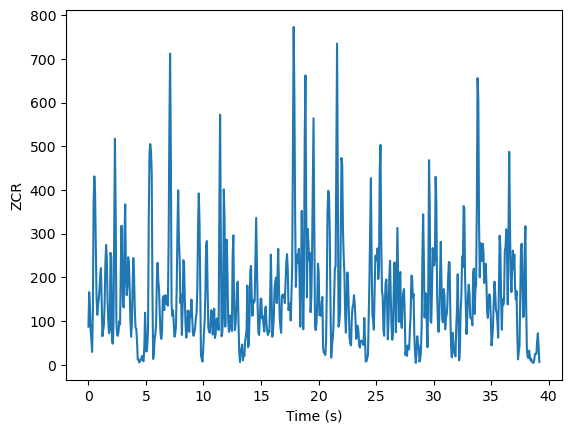

In [18]:
overlap = 512
re_wave_data = wave_data.reshape(-1, 1)

zcr = zeroCR(re_wave_data, FRAME_SIZE, overlap)

time_2 = np.arange(0, len(zcr)) * (len(re_wave_data) / len(zcr)/ frame_rate)

plt.plot(time_2, zcr)

plt.ylabel('ZCR')
plt.xlabel('Time (s)')

plt.show()
